### Import libraries :

In [1]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

2023-12-13 19:08:25.953403: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 19:08:25.955311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 19:08:25.977989: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 19:08:25.978016: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 19:08:25.978033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf  # load library (before that from terminal: pip install tensorflow)
from tensorflow import keras # keras is part of tf from tf version >= 2.0

In [4]:
from tensorflow.keras.preprocessing.image import load_img # per importare immagini

In [5]:
path = './chest_xray_small/test/NORMAL'
name = 'NORMAL2-IM-0117-0001.jpeg'
fullname=f'{path}/{name}'

In [6]:
fullname

'./chest_xray_small/test/NORMAL/NORMAL2-IM-0117-0001.jpeg'

### Load images :

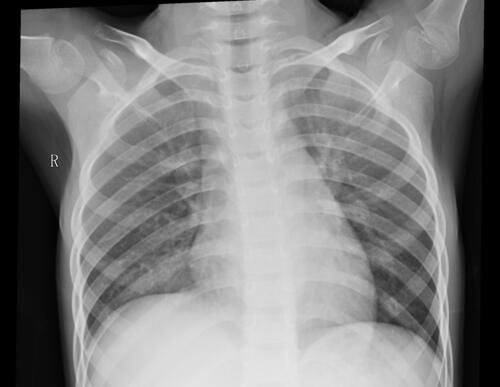

In [7]:
load_img(fullname)

In [8]:
img = load_img(fullname, target_size=(224,224))

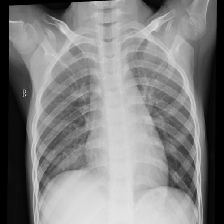

In [9]:
img

In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F0D20423D60>


In [12]:
# image = array with three channel : red_channel, green_channel, blue_channel

In [13]:
np.array(img) # this is how we turn an image loaded with keros in a numpy array!

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [14]:
x=np.array(img) # the type is:uint8 -> unsigned int(8bits), a value from 0 to 255

In [15]:
x.shape

(224, 224, 3)

### Use pre-trained convolutional NN based on imagenet dataset :

In [16]:
from tensorflow.keras.applications.resnet50 import ResNet50 # loading pretrained model from keras website

In [17]:
model = ResNet50(weights='imagenet', input_shape=(224,224,3))

In [18]:
X = np.array([x, x, x, x]) # un array di immagini

In [19]:
X.shape

(4, 224, 224, 3)

In [20]:
X = np.array([x])

In [21]:
# model.predict(x) # doesn't work!

In [22]:
# model.predict(X) # it works but the results doesn't have any sense!

### we need to Preprocess input :

In [24]:
from tensorflow.keras.preprocessing import image

In [25]:
# when the model has trained all the images for the training passed thrugh preprocess function 
# so we have to do the same to let the model evaluate our image!

In [26]:
X=preprocess_input(X)

In [29]:
pred = model.predict(X)

1/1 [==============================] - 0s 488ms/step


In [30]:
pred.shape # 1 image, 1000 classes

(1, 1000)

### Le't see the predictions based on imagenet dataset :

In [31]:
pred # this is the probability that the image belong at same classes

array([[2.91347601e-06, 1.69305975e-04, 8.18663393e-05, 1.79291412e-03,
        9.61202240e-05, 2.73637556e-06, 2.37344898e-06, 5.91890193e-06,
        4.29106012e-06, 6.13264604e-07, 9.51862091e-07, 4.49657227e-06,
        7.36946731e-06, 1.80879761e-06, 1.36748804e-06, 3.21903326e-06,
        6.57662940e-06, 4.75072693e-06, 5.17969511e-06, 1.36253784e-05,
        6.87053102e-07, 9.15914711e-07, 3.64162634e-06, 1.59707961e-05,
        1.19870811e-06, 6.66763253e-06, 7.56010286e-06, 2.11669999e-06,
        6.72166425e-06, 2.84399022e-03, 3.63198950e-07, 1.49320622e-05,
        8.58995190e-06, 8.28242719e-06, 2.16814874e-06, 1.60407149e-06,
        3.93566952e-05, 1.01928090e-05, 7.75530771e-06, 1.52348639e-05,
        1.45685472e-05, 2.57959459e-06, 1.42585634e-07, 6.93415075e-07,
        1.44657106e-05, 1.41129158e-05, 1.56566530e-05, 3.31308826e-07,
        6.33796662e-06, 4.74884871e-07, 5.85717953e-06, 4.21517086e-07,
        1.57294326e-05, 2.59850049e-06, 1.00031011e-05, 1.030090

In [33]:
decode_predictions(pred)

[[('n04209239', 'shower_curtain', 0.48204878),
  ('n03544143', 'hourglass', 0.24299666),
  ('n03788365', 'mosquito_net', 0.016909314),
  ('n04590129', 'window_shade', 0.012904593),
  ('n04040759', 'radiator', 0.0102004)]]

### Transfer learning : we want to use the same model to classify the images on our classes and not on imagenet dataset classes.


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [45]:
train_ds = train_gen.flow_from_directory(
    './chest_xray_small/train', 
    target_size=(224, 224),
    batch_size=32
)

Found 5216 images belonging to 2 classes.


In [46]:
train_ds.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [47]:
train_ds.color_mode

'rgb'

In [48]:
!ls -l chest_xray_small/train/

totale 276
drwxrwxr-x 2 francesco francesco  69632 dic 11 20:25 NORMAL
drwxrwxr-x 2 francesco francesco 212992 dic 11 20:25 PNEUMONIA


In [49]:
# the name of the classes are coming from the name of the directories

In [50]:
X, y = next(train_ds) 

In [51]:
X # load a bounch of image and apply the preprocess function, so we have a similar output as before

array([[[[ 1.0806100e+02,  9.5221001e+01,  8.8320000e+01],
         [ 1.0406100e+02,  9.1221001e+01,  8.4320000e+01],
         [ 1.0406100e+02,  9.1221001e+01,  8.4320000e+01],
         ...,
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         [ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.7060997e+01,  8.4221001e+01,  7.7320000e+01]],

        [[ 1.0706100e+02,  9.4221001e+01,  8.7320000e+01],
         [ 1.0306100e+02,  9.0221001e+01,  8.3320000e+01],
         [ 1.0406100e+02,  9.1221001e+01,  8.4320000e+01],
         ...,
         [ 7.4060997e+01,  6.1221001e+01,  5.4320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 1.0106100e+02,  8.8221001e+01,  8.1320000e+01]],

        [[ 1.0606100e+02,  9.3221001e+01,  8.6320000e+01],
         [ 1.0006100e+02,  8.7221001e+01,  8.0320000e+01],
         [ 1.0106100e+02,  8.8221001e+01,  8.1320000e+01],
         ...,
         [ 7.0060997e+01,  5.7221001e+01,  5.0320000e+01],
         [

In [52]:
X.shape

(32, 224, 224, 3)

In [53]:
y[:10] # look the first 10 y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [54]:
train_ds.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [55]:
#### We do the same for validation :

In [56]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './chest_xray_small/val/', 
    target_size=(224, 224), 
    batch_size=32,
    shuffle=False # for validation we do not need to shuffle
)

Found 222 images belonging to 2 classes.


In [57]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False, # does not include dense layer --> per utilizzare il modello pretrained e personalizzarlo
    input_shape=(224,224,3)
)

base_model.trainable=False # we use it as it is

### Now we want to train a new top on the base model:

In [58]:
inputs = keras.Input(shape=(224,224,3))
base = base_model(inputs, training=False)
output = base
model = keras.Model(inputs,output)

In [59]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [60]:
preds.shape # this is 4D, we need a vector : let's use average pulling !

(32, 7, 7, 2048)

### Con average pulling passiamo al vettore che volevamo :

In [61]:
inputs = keras.Input(shape=(224,224,3))
base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

output = vectors
model = keras.Model(inputs,output)

preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [62]:
preds.shape # 32 vettori di lunghezza 2048

(32, 2048)

#### this way to write a neural network it is called: "funcional style" :

In [ ]:
inputs = keras.Input(shape=(224,224,3))

base = base_model(inputs, training=False)# we "invoked" the model and we pass some parameter to it
# inputs is the input and base is the output for the model

vectors = keras.layers.GlobalAveragePooling2D()(base)
# input for the pulling is base, and output is vector

output = vectors

model = keras.Model(inputs,output)
preds = model.predict(X)

In [ ]:
preds.shape 

#### now we have *the base* -> *the vector* , and we want to build the *dense layer* :

In [ ]:
output = keras.layers.Dense(2)(vectors) # il nostro dense layer personalizzato su due classi !
# vector in input of the dense layer, the output of dense layer it is the output: predictions

model = keras.Model(inputs,output)
preds = model.predict(X)

In [ ]:
preds[0]

In [ ]:
# this is random things, the model it is not trained yet 
# specially dense layer that is made of random number initially
# to train it we need a couple of things :
# 1) optimizer
# 2) something else

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(
from_logits=True, # keep the raw score
)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_ds, epochs=10, validation_data=val_ds)  # every epochs we go through the dataset once

#### this model is cleary overfitting because the accuracy on the train it is almost 1 and the accuracy on the val doesn't increase 

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
# it is already a good model but it overfit after ONE iteration, we can tune it a bit in the next lesson


## As first parameter we tune learning_rate :

In [ ]:
def make_model(learning_rate=0.01):

    base_model = ResNet50(
    weights='imagenet', ## neural network taken from imagenet, but only the convolutional layers
    include_top=False, ## without dense layer on top, we want to train our dense layer
    input_shape=(224,224,3)
    )

    base_model.trainable=False # we use it as it is  
   
    ############################################## possible to create a function for this: create_architecture 

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False) # pretrained neural network without dense layers
    vectors = keras.layers.GlobalAveragePooling2D()(base) # neural network extract vector rapresentation of the img
    output = keras.layers.Dense(2)(vectors) # produce output directly from vector through dense layer
    model = keras.Model(inputs,output)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss, 
        metrics=['accuracy']
    )
        
    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) 
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    print(lr)
    print(hist)

### Accuracy nel dataset train :

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()
    

### Accuracy nel dataset val :

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()

#### Vediamo che 0.0001 lear too slow, and also 0.1 is not perform very well :

In [ ]:
del scores[0.0001]
del scores[0.1]

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()

### It is clear from the graph that the best learning_rate is = 0.01

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train%s'%lr))
    plt.plot(hist['val_accuracy'], label=('val%s'%lr))

plt.xticks(np.arange(10))
plt.legend()

#### We choose learning_rate= 0.01 as best parameter after data comparison 

In [ ]:
learning_rate = 0.01

#### Now we want to save chackpoints, that are the points exactly at the top of the peak, before the model drop!

### Checkpoint :

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'ResNet50_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only= True,
    monitor='val_accuracy',
    mode='max', 
)

In [ ]:
#### Train our model_V1 with choose learning_rate and save best performing epoch with checkpoint:

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]

) 

scores[lr] = history.history

## Adding more dense layers : the inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):

    base_model = ResNet50(
    weights='imagenet', ## neural network taken from imagenet, but only the convolutional layers
    include_top=False, ## without dense layer on top, we want to train our dense layer
    input_shape=(224,224,3)
    )

    base_model.trainable=False # we use it as it is 
    
    ############################################## possible to create a function for this: create_architecture 

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False) # NN
    vectors = keras.layers.GlobalAveragePooling2D()(base) # Vector rapresentation of the img
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # Adding the inner layer !!
    
    #output = keras.layers.Dense(10, activation='softmax')(inner) NON LO USIAMO perchè invece usiamo logits=True !
    
    output = keras.layers.Dense(2)(inner) # Output through dense layer
    model = keras.Model(inputs,output)

    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss, 
        metrics=['accuracy']
    )
        
    return model

## Tuning inner layer size : size_inner

In [ ]:
learning_rate = 0.01 # Tuned before

scores = {}

for size in [10, 100, 1000]:
    
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds) 
    scores[size] = history.history

    print()
    print()

In [ ]:
scores

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train%s'%size))
    plt.plot(hist['val_accuracy'], label=('val%s'%size))

plt.xticks(np.arange(10))
plt.yticks([0.78,0.80,0.82,0.84])
plt.legend()

In [ ]:
# 100 seems to be the best size for the inner layer :

In [ ]:
size=100

## Tuning dropout : droprate

In [65]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):

    base_model = ResNet50(
    weights='imagenet', ## neural network taken from imagenet, but only the convolutional layers
    include_top=False, ## without dense layer on top, we want to train our dense layer
    input_shape=(224,224,3)
    )

    base_model.trainable=False # we use it as it is 
   
    ############################################## possible to create a function for this: create_architecture 

    inputs = keras.Input(shape=(224,224,3))
    base = base_model(inputs, training=False) # pretrained neural network without dense layers
    vectors = keras.layers.GlobalAveragePooling2D()(base) # neural network extract vector rapresentation of the img
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # inner layer -> activation  

    drop = keras.layers.Dropout(droprate)(inner)# 0,5 = droprate, quanto vogliamo freezare parametro della funzione
    
    output = keras.layers.Dense(2)(inner) # Output through dense layer
    model = keras.Model(inputs,output)

    ##############################################
    ############################################## 
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss, 
        metrics=['accuracy']
    )
        
    return model

In [ ]:
#learning_rate = 0.01 # tuned before
# size = 100 # tuned before

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                      droprate=droprate)
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds) 
    
    # with dropout we removed some information and now we need more epochs to learn something!
    
    scores[droprate] = history.history

    print()
    print()

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val%s'%droprate))

    plt.legend()

In [ ]:
x=0.20
hist = scores[x]
plt.plot(hist['val_accuracy'], label=('val%s'%x))
plt.legend()

In [ ]:
x=0.50
hist = scores[x]
plt.plot(hist['val_accuracy'], label=('val%s'%x))
plt.plot(hist['accuracy'], label=('train%s'%x))

plt.legend()

#### final comparation :

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]         
plt.plot(hist['val_accuracy'], label=0.5)
         
plt.legend()

#### Performance improved : we choose droprate=0.5 

In [ ]:
droprate=0.5

### Complete data augmentation : generate more data form images dataset to try to learn more

In [66]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    
    rotation_range=30,
    width_shift_range=10.0,
    height_shift_range=10.0,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

#Wr apply augmentation only on training_dataset. validation_dataset stay the same:

train_ds = train_gen.flow_from_directory(
    './chest_xray_small/train/', 
    target_size=(224, 224), 
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './chest_xray_small/val/', 
    target_size=(224, 224), 
    batch_size=32,
    shuffle=False 
)

Found 5216 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [67]:
#learning_rate = 0.01 # trained before
# size = 100 # trained before
# droprate = 0.5 # trained before

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
   
history = model.fit(train_ds, epochs=50, validation_data=val_ds) 

# 50 epochs because we added more images with augmentation!

Epoch 1/50
163/163 [==============================] - 152s 922ms/step - loss: 0.3089 - accuracy: 0.9258 - val_loss: 0.2976 - val_accuracy: 0.8739
Epoch 2/50
163/163 [==============================] - 162s 995ms/step - loss: 0.1197 - accuracy: 0.9542 - val_loss: 0.2602 - val_accuracy: 0.8964
Epoch 3/50
163/163 [==============================] - 162s 994ms/step - loss: 0.1183 - accuracy: 0.9553 - val_loss: 0.3608 - val_accuracy: 0.8423
Epoch 4/50
163/163 [==============================] - 162s 995ms/step - loss: 0.1083 - accuracy: 0.9605 - val_loss: 0.3407 - val_accuracy: 0.8468
Epoch 5/50
163/163 [==============================] - 162s 994ms/step - loss: 0.1022 - accuracy: 0.9607 - val_loss: 0.2352 - val_accuracy: 0.9144
Epoch 6/50
163/163 [==============================] - 162s 994ms/step - loss: 0.1129 - accuracy: 0.9561 - val_loss: 0.3457 - val_accuracy: 0.8784
Epoch 7/50
163/163 [==============================] - 162s 994ms/step - loss: 0.0938 - accuracy: 0.9636 - val_loss: 0.2288 -

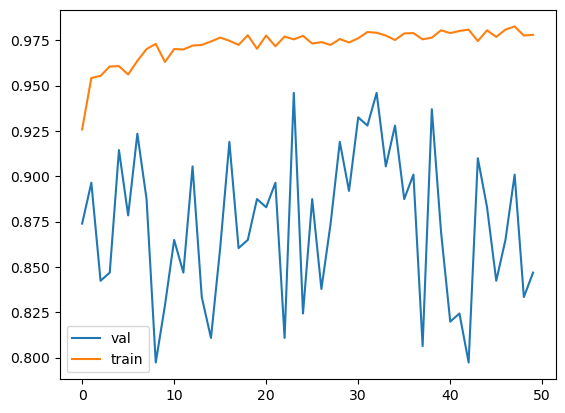

In [68]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Let's try with augmentation - but less than before :

In [75]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    
    ### augmentation   
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True 
)

train_ds = train_gen.flow_from_directory(
    './chest_xray_small/train/', 
    target_size=(input_size, input_size), 
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './chest_xray_small/val/', 
    target_size=(224, 224), 
    batch_size=32,
    shuffle=False 
)

Found 5216 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [78]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'ResNet50_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only= True,
    monitor='val_accuracy',
    mode='max' 
)

### Train our model_V2 with choosen parameter and save best performing epoch with checkpoint:

In [79]:
#learning_rate = 0.01 # as tuned before
#size = 100 # as tuned before
#droprate = 0.5 # as tuned before

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
   
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint]) 

Epoch 1/50
163/163 [==============================] - ETA: 0s - loss: 0.5484 - accuracy: 0.9317

/home/francesco/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


163/163 [==============================] - 161s 979ms/step - loss: 0.5484 - accuracy: 0.9317 - val_loss: 0.2695 - val_accuracy: 0.8784
Epoch 2/50
163/163 [==============================] - 156s 953ms/step - loss: 0.0992 - accuracy: 0.9624 - val_loss: 0.6540 - val_accuracy: 0.7523
Epoch 3/50
163/163 [==============================] - 162s 991ms/step - loss: 0.0858 - accuracy: 0.9686 - val_loss: 0.2296 - val_accuracy: 0.8919
Epoch 4/50
163/163 [==============================] - 162s 993ms/step - loss: 0.0799 - accuracy: 0.9701 - val_loss: 0.2821 - val_accuracy: 0.8874
Epoch 5/50
163/163 [==============================] - 162s 992ms/step - loss: 0.0782 - accuracy: 0.9689 - val_loss: 0.2147 - val_accuracy: 0.9144
Epoch 6/50
163/163 [==============================] - 163s 996ms/step - loss: 0.0812 - accuracy: 0.9693 - val_loss: 0.4362 - val_accuracy: 0.8333
Epoch 7/50
163/163 [==============================] - 162s 992ms/step - loss: 0.0785 - accuracy: 0.9709 - val_loss: 0.1946 - val_accura

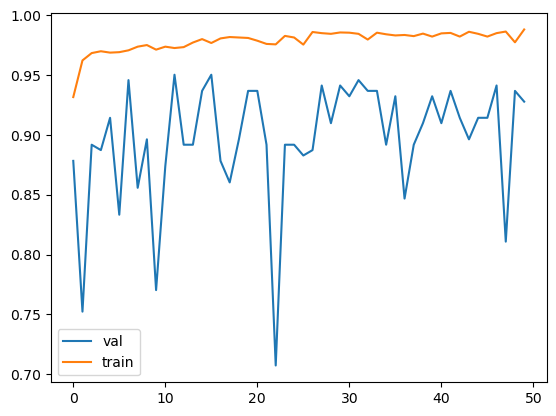

In [80]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()